In [1]:
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

In [2]:
data = pd.read_csv("creditcard.csv")
data=data.iloc[1:50000,]
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [3]:
x = data.drop(["Class"], axis=1)
y = data["Class"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

# Build The Autoencoder Model

In [4]:
## input layer 
input_layer = Input(shape=(x.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(x.shape[1], activation='relu')(decoded)

In [5]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")


In [6]:
history=autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split =0.20);

Epoch 1/10
7/7 [==============================] - 1s 32ms/step - loss: 0.2608 - val_loss: 0.2597
Epoch 2/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2604 - val_loss: 0.2594
Epoch 3/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2601 - val_loss: 0.2591
Epoch 4/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2598 - val_loss: 0.2587
Epoch 5/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2595 - val_loss: 0.2584
Epoch 6/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2591 - val_loss: 0.2581
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2588 - val_loss: 0.2578
Epoch 8/10
7/7 [==============================] - 0s 6ms/step - loss: 0.2585 - val_loss: 0.2574
Epoch 9/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2582 - val_loss: 0.2571
Epoch 10/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2578 - val_loss: 0.2568


# Visualization of model loss

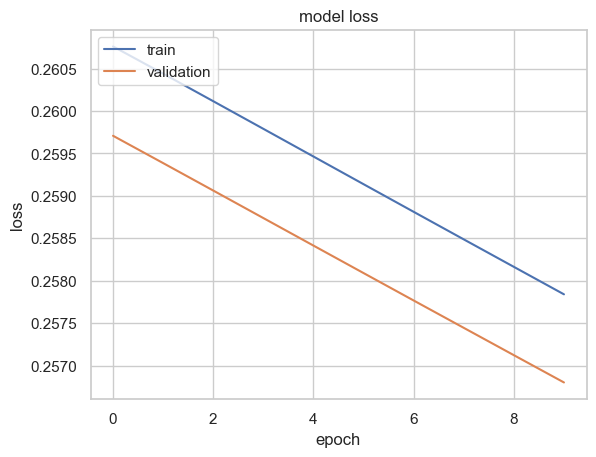

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#  Obtain the Latent Representations

In [8]:
hid_rep = Sequential()
hid_rep .add(autoencoder.layers[0])
hid_rep .add(autoencoder.layers[1])
hid_rep .add(autoencoder.layers[2])

In [9]:
norm_hid_rep = hid_rep .predict(x_norm[:3000])
fraud_hid_rep = hid_rep .predict(x_fraud)

5/5 [==============================] - 0s 1ms/step


# TSNE representation of oroginal dataset

In [10]:
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]

df = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,37749.0,1.098476,-0.115717,1.147550,1.095007,-0.561087,0.784475,-0.745511,0.392148,0.632806,...,-0.005942,0.205298,-0.025326,-0.294630,0.361592,-0.376578,0.086329,0.020919,4.99,0
1,4333.0,-1.851457,-0.978678,0.420447,-2.207631,-1.266113,0.735528,-1.010135,1.085141,1.453133,...,-0.090712,0.370862,0.107157,-0.670522,-0.663958,-0.633243,0.000992,-0.152873,142.83,0
2,27163.0,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99,1
3,24192.0,-0.713344,1.037989,2.828168,4.727206,0.204219,0.286762,-0.282015,0.191656,-0.512461,...,0.082554,0.255710,-0.143930,0.295018,-0.027653,0.445670,0.061841,0.103597,15.29,0
4,6425.0,-1.105256,0.780094,1.744361,0.529521,0.579651,-0.484222,1.349341,-0.799622,1.635984,...,-0.260561,-0.095163,-0.288031,0.284931,0.069671,-0.669268,-0.824502,-0.116238,59.90,0


In [11]:
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

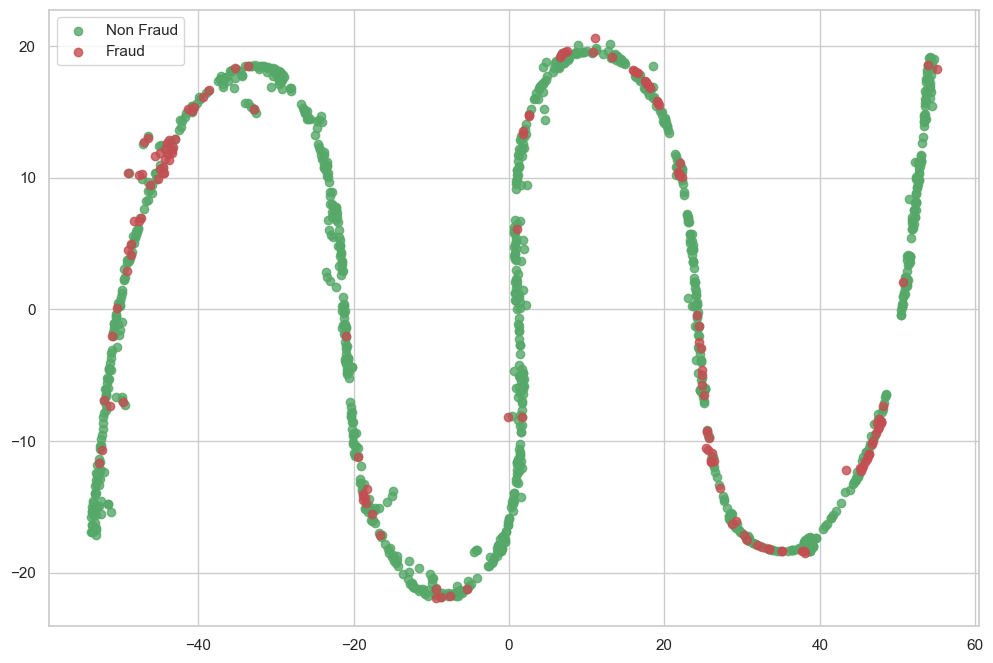

In [12]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')

    plt.legend(loc='best')
    plt.savefig(name)
    plt.show()

tsne_plot(X, Y, "original.png")

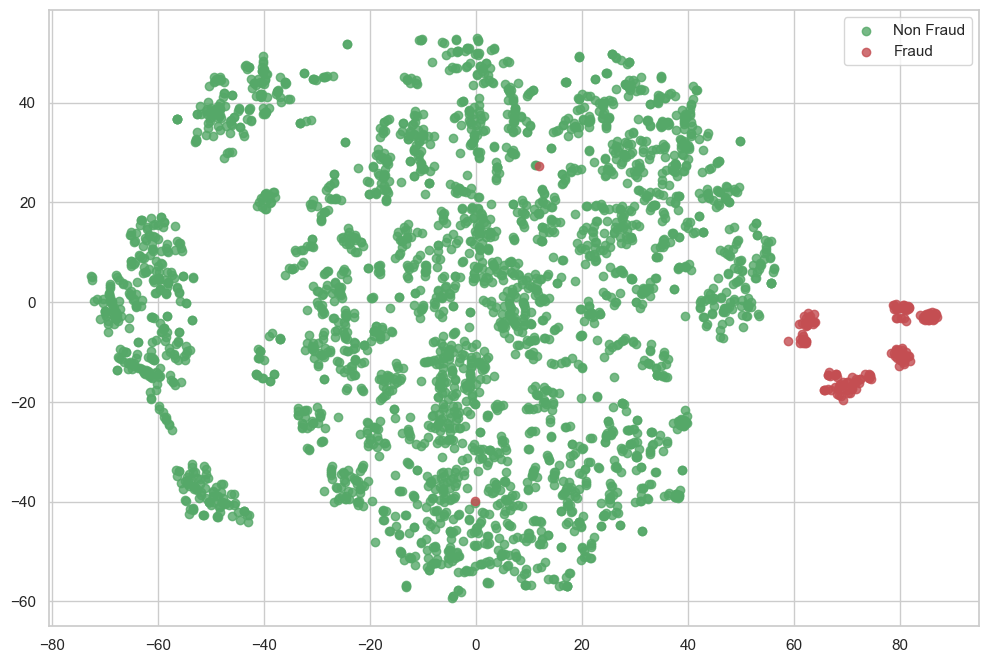

In [13]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

In [14]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression().fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("confusion_matrixt: ")
print (confusion_matrix(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


confusion_matrixt: 
[[754   0]
 [  8  25]]

Accuracy Score:  0.9898348157560356


In [15]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_x, train_y)
pred_y = svclassifier.predict(val_x)

print ("")
print ("confusion_matrixt: ")
print (confusion_matrix(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


confusion_matrixt: 
[[745   0]
 [  1  41]]

Accuracy Score:  0.9987293519695044
